<a href="https://colab.research.google.com/github/HamacherA/HamacherData/blob/main/coding_homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #5

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>acc_hits_hw5.csv</code> and <code>acc_fa_hw5.csv</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>acc_hits</code> and <code>acc_fa</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>shape</code> of each array.

5. Both your <code>acc_hits</code> and <code>acc_fa</code> arrays consist of LFP data recorded from the mouse anterior cingulate cortex. Rows of these arrays correspond to separate trials, and columns correspond to samples (timepoints). The task that the mouse was performing is called the **continuous performance test**. This test measures sustained attention. Specifically, the mouse is shaped to respond to a stimulus on a touchscreen. The mouse is rewarded (receives some strawberry milkshake) when it responds to one type of stimulus. This stimulus is called the S+ (it usually looks like horizontal or vertical black and white bars). When the mouse responds to this stimulus, we call that response a **hit**. Your <code>acc_hits</code> variable contains LFP surrounding these hits. In contrast, when the mouse is presented with another stimulus (the S-, which usually looks like a snowflake), it is not supposed to respond. When it does respond, we call that a **false alarm**. Your <code>acc_fa</code> variable contains LFP surrounding these false alarms. So, you have two arrays - one array with LFP recorded during correct choices (hits), and one array with LFP recorded during incorrect choices (false alarms).

6. In a new *Code Cell*, create variable called <code>time</code> that has the same length as <code>acc_hits</code> and <code>acc_fa</code>, with equally spaced values between "zero" and "four" (the length of each trial, in seconds).

7. In a new *Code Cell*, create an expression to determine the sampling rate of the data using the knowledge that you have 8001 samples, and the total length of each sample is 4 seconds.

8. In a new *Code Cell*, plot the first trial of <code>acc_hits</code> in one subplot, and the first trial of <code>acc_fa</code> in another subplot. Plot your <code>time</code> variable on the x-axis. Label your axes.

9. In a new *Markdown Cell*, describe what you think the dominant oscillation (in Hz) in the LFP might be. Does this differ between the first trial of <code>acc_hits</code> and the first trial of <code>acc_fa</code>?

10. We want to have some way to compare LFPs between the two conditions (hits and false alarms). One way to do this might be to compute an event-related potential (ERP) to see if there are structural changes surrounding screen touch for either of the two conditions. In a new *Code Cell*, calculate and plot the ERP for <code>acc_hits</code>. Put <code>time</code> on the x-axis. Put a vertical black line at the "two" position on the x-axis (the screen touch occurred 2 seconds into the sample on each trial). Put a horizontal black line at the "zero" position on the y-axis. Label your axes.

11. In a new *Markdown Cell*, interpret your ERP for hits. Do you see any evidence of consistent activity in the LFP surrounding screen touch (vertical black bar)?

12. Repeat step 10 for <code>acc_fa</code>. Plot your ERP for <code>acc_fa</code> and your ERP for <code>acc_hits</code> in one plot, with <code>time</code> on the x-axis. Make a vertical and horizontal black bar on your plot (as outlined in step 10), and label your axes.

13. In a new *Markdown Cell*, interpret your plot from step 12. Are there any differences in the ERPs between hits and false alarms?

14. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

15. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_5.ipynb</code>.

### Andrew Hamacher
*neural data analysis*

**3/19/2024**

In [4]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#reading data files, going through pandas because loadtxt doesn't work for some reason
acc_fa = np.loadtxt('https://raw.githubusercontent.com/HamacherA/HamacherData/main/acc_fa_hw5.csv', delimiter = ',')
acc_hits = np.loadtxt('https://raw.githubusercontent.com/HamacherA/HamacherData/main/acc_hits_hw5.csv', delimiter = ',')



In [6]:
#printing the shape of each
print(
  np.shape(acc_hits),
  np.shape(acc_fa)
)

(24, 8001) (19, 8001)


In [7]:
#creating the time function with a length of 8001
time = np.linspace(0,4,8001)

In [8]:
#determining the sampling rate, (in Hz)
rate = 8001/4
rate

2000.25

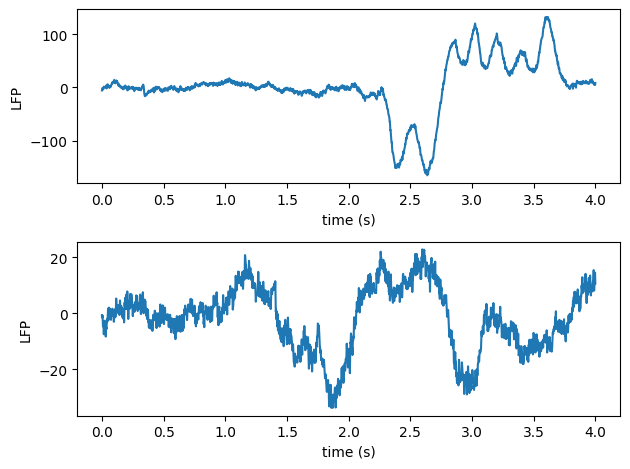

In [9]:
#plotting the first trial for both a hit and FA LFP
fig, ax = plt.subplots(2)
ax[0].plot(time, acc_hits[0])
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('LFP')
ax[1].plot(time, acc_fa[0])
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('LFP')
fig.tight_layout()



The dominant oscilaation is hard to tell, but seems to be fairly similar for both the hits and FA, seeming to be around 2.5Hz for both.

Text(0, 0.5, 'ERP')

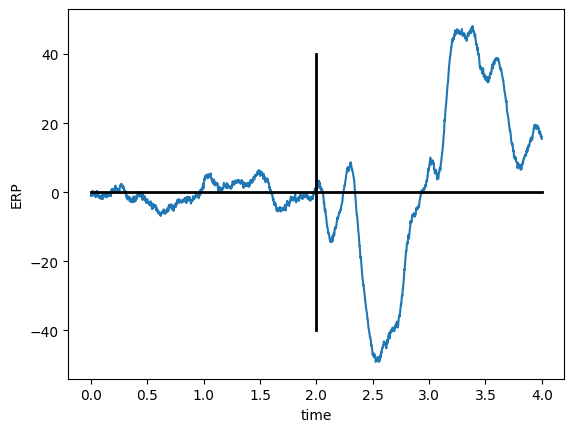

In [10]:
#plotting hits ERP on graph with bar showing where screen touch occured and baseline of 0
plt.plot(time, acc_hits.mean(0))
plt.plot([2,2],[-40,40],'k',lw=2)
plt.plot([0,4],[0,0],'k',lw=2)
plt.xlabel('time')
plt.ylabel('ERP')

There is strong evidence for an evoked potential by the activity, as after the screen touch the amplitude of the potential greatly increases

Text(0, 0.5, 'ERP')

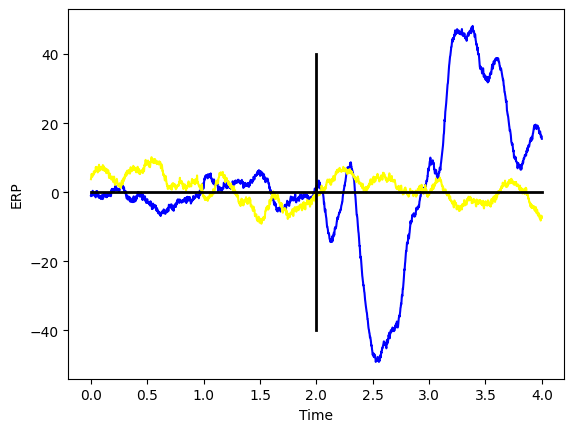

In [11]:
#plotting both hits and FA's on same graph, with bars showing where the screen touch occured and baseline of 0.
plt.plot(time, acc_hits.mean(0), color = 'blue')
plt.plot(time, acc_fa.mean(0), color = 'yellow')
plt.plot([2,2],[-40,40],'k',lw=2)
plt.plot([0,4],[0,0],'k',lw=2)
plt.xlabel('Time')
plt.ylabel('ERP')


The hit erp shows a strong change in signal amplitude and frequency after the screen is touched for the hits, but there is no response for the FA's after the screen touch.